# Anomaly Detection

- Finding anomaly in the dataset is called anomaly detection.
- Anomaly is a data that differ alot from the rest.
- also called "abnormality" or "deviant".
- also called subset of outlier.

`All Observations = Normal Data + Outliers`  
`Outliers = Noise + Anomalies`  
`Noise = Uninteresting Outlier`  
`Anomalies = Sufficiently Interesting Outlier`

## Types of Anomalies

**1. Point Anomalies**
 - An individual data point that differ a lot or seems strange when compared with the rest of the data.
 - eg. An unusually large credit card purchase.
 
**2. Contextual Anomalies**
 - The data seems strange in a specific context, but not otherwise.
 - eg. A US credit card holder makes a purchase in Japan.
 
**3. Collective Anomalies**
 - A collection of datapoints seems strange when compared with entire dataset, although each point may be OK.
 - eg. ten consecutive credit card purchase for a sandwich at hourly intervals.

## Applications and Use cases
- Fraud detection in credit card purchase
- Intrusion detection in computer network
- Fault detection in mechanical equipment
- Earthquake warning
- Automated surveillance
- Detect fake social media accounts

## Anomaly Detection: the fundamental idea
The approach used by almost all anomaly detection algorithms is
- Create a model for that will tell what normal data should like.
- Calculate score for each datapoint that measure how far are those data points from the normal data.
- If score is above a previously defined threshold, classify data point as an anomaly.

The approach you take depends upon what you know
1. If you have examples of normal and anomalous  data, you can use this information to find anomalies. This is called supervised anomaly detection.

2. If you don't have any prior information about normal or anomalous data, you have to use different approach. This is called unsupervised anomaly detection. Required probabilites and statistics to look for anomalies.

# Review of Probability and Statistics

## Probability Distribution
- Chance of obtaining a data value(or range of values).
- The normal(Gaussian) distribution is the probability distribution most commonly used to model data.
- Caution: The normal distribution may not be appropriate  for your specific data.

## Cumulative Distribution Function
- Describe the probability distribution of a random variable.
- F(x) = P(X <= x)
- In other words, for any real number x, the F(x) represents the probability that the random variable X is less than or equal to x.

Let's understand better this with code.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
# Set the mean and standard deviation for the normal distribution
mu = 0
sigma = 1

In [3]:
# Generate a range of values for the x-axis
x = np.linspace(-3, 5, num=150)

In [4]:
print(x.shape)

(150,)


![Screenshot from 21-12-23 16:16:34](https://github.com/surajkarki66/MediLeaf_backend/assets/50628520/630d18ae-1db0-4d6c-93ce-0a6fc9a367f0)


In [5]:
def pdf_univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [6]:
# Calculate the probability distribution function (PDF) for each x using manual function
pdf_m = pdf_univariate_normal(x, mu, sigma)
print(pdf_m.shape)
print(pdf_m[0])

(150,)
0.0044318484119380075


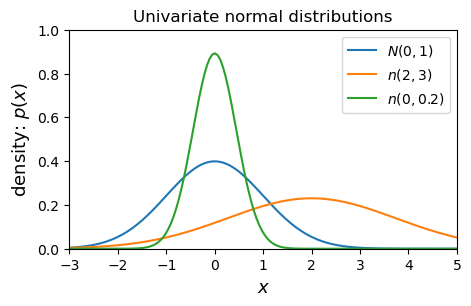

In [7]:
# Plot different Univariate Normals using manual function
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, pdf_univariate_normal(x, mean=0, variance=1), 
    label="$N(0, 1)$")

plt.plot(
    x, pdf_univariate_normal(x, mean=2, variance=3), 
    label="$n(2, 3)$")

plt.plot(
    x, pdf_univariate_normal(x, mean=0, variance=0.2), 
    label="$n(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)

plt.show()

In [8]:
# Calculate the cumulative distribution function (CDF) for each x
cdf = norm.cdf(x, mu, sigma)

In [9]:
print(cdf.shape)
print(cdf[0])

(150,)
0.0013498980316300933


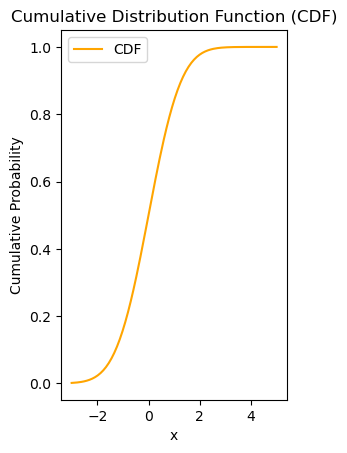

In [10]:
# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='orange')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.show()

## Multivariate Normal Distribution
The multivariate normal distribution is a multidimensional generalisation of the one dimensional normal distribution. It represents the distribution of a multivariate random variable, that is made up of multiple random variables which can be correlated with each other.

Like the univariate normal distribution, the multivariate normal is defined by sets of parameters: the mean vector μ. which is expected value of the distribution and the variance-covariance matrix Σ, which measures how two random variables depend on each other and how they change together.

![Screenshot from 21-12-23 16:55:21](https://github.com/surajkarki66/MediLeaf_backend/assets/50628520/1150fd2c-3903-4372-9c56-7785101e3e83)

where x is a random vector of size d, μ is d×1 mean vector and Σ is the (symmetric and positive definite) covariance matrix of size d×d and |Σ| is the determinant. We denote this multivariate normal distribution as N(μ,Σ).

In [11]:
def pdf_multivariate_normal(x, d, mean, covariance): #d=no.of dimensions
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [12]:
# generate multi variate data
x1s = np.linspace(-5, 5, num=100)
x2s = np.linspace(-5, 5, num=100)
x1, x2 = np.meshgrid(x1s, x2s)

In [13]:
x1.shape

(100, 100)

In [14]:
x2.shape

(100, 100)

In [15]:
# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])

In [16]:
pdf = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        pdf[i,j] = pdf_multivariate_normal(
            np.matrix([[x1[i,j]], [x2[i,j]]]), 
            2, bivariate_mean, bivariate_covariance)

In [17]:
pdf.shape

(100, 100)

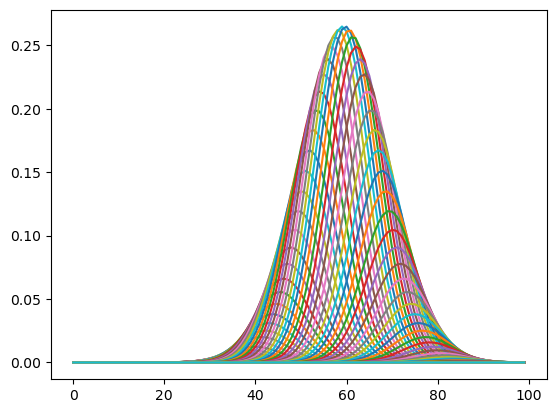

In [18]:
plt.plot(pdf)

In [19]:
# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])
bivariate_covariance = np.matrix([
    [1., 0], 
    [0, 1.]])

In [20]:
pdf = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        pdf[i,j] = pdf_multivariate_normal(
            np.matrix([[x1[i,j]], [x2[i,j]]]), 
            2, bivariate_mean, bivariate_covariance)

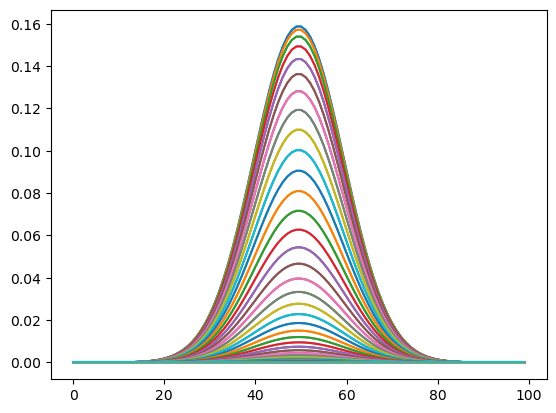

In [21]:
plt.plot(pdf)

## PDF vs CDF
- Both are useful for anomaly detection
- If you want to identify anomalies as low probability events, then using a probability distribution is straightforward.
- For visual inspection of anomalies, the CDF is often more robust.

## Fundamentals of Statistics
- mean
- median
- mode

Note: `Mean is more affected by outliers than Median and Mode` 

Example

In [22]:
from scipy.stats import mode

# Consider values
values = np.array([2, 2, 3, 4, 7, 8, 9])
mean = np.mean(values)
median = np.median(values)
mo = mode(values)

In [23]:
print("Mean= ", mean)
print("Median= ", median)
print("Mode= ", mo.mode)

Mean=  5.0
Median=  4.0
Mode=  2


In [24]:
# Now, lets introduce outliers to the data
values = np.array([2, 2, 3, 4, 7, 8, 9, 30])

In [25]:
mean = np.mean(values)
median = np.median(values)
mo = mode(values)

In [26]:
print("Mean= ", mean)
print("Median= ", median)
print("Mode= ", mo.mode)

Mean=  8.125
Median=  5.5
Mode=  2


As you can see Mean is abruptly changes when outlier is introduced in the data.

### Variance
The spread of the data about the mean.

In [27]:
var = np.var(values)
print("Variance = ", var)

Variance =  74.859375


In [28]:
std = np.std(values)
print("Standard Deviation = ", std)

Standard Deviation =  8.652131240336105


## Statistical Tests
- Since the mean and standard deviation are themselves sensitive to anomalies, the z-score can sometimes be unreliable.
- The modified z-score tackles this problem by using medians instead.

In [29]:
import scipy.stats as ss

### Z-score in action
Goal: Identify schools with low participation rates as a first step in helping these schools improve their participation rates.

In [30]:
df = pd.read_csv('SAT_CT_District_Participation_2012.csv') 
print(df.shape)
df.head()

(130, 2)


,District,Participation Rate
0,Ansonia,0.66
1,Avon,0.90
2,Berlin,0.81
3,Bethel,0.86
4,Bloomfield,0.81


Assuming the data can be represented with a normal distribution, we will begin (we will validate this later). And to find abnormalities, we'll utilize the z-score. Our cutoff will be a negative figure because we are concerned about low participation rates and are seeking for schools with rates that are lower than the norm. Here, we make a decision. In other words, a school will be considered abnormal if its z-score is less than -2. 

Note that for bigger datasets, larger absolute values of $z$ (typically $z = 3$) are often used as a threshold. Because we have a small dataset, a large value of $z$ might lead to no data being labeled as an anomaly. Also, we were conservative in our choice of $z$ because we want to help as many schools as possible. 

In [31]:
mean_rate = df['Participation Rate'].mean()

# ddof is the degrees of freedom correction 
# in the calculation of the standard deviation;
# for population standard deviation ddof=0
stdev_rate = df['Participation Rate'].std(ddof=0)

In [32]:
print('Mean participation rate is {:.3f}'.format(mean_rate))
print('Standard deviation is {:.3f}'.format(stdev_rate))

Mean participation rate is 0.741
Standard deviation is 0.136


In [33]:
zscore_rate = ss.zscore(df['Participation Rate'], ddof=0)
df = df.assign(zscore=zscore_rate)
df.head(8)

,District,Participation Rate,zscore
0,Ansonia,0.66,-0.593779
1,Avon,0.90,1.175649
2,Berlin,0.81,0.512113
3,Bethel,0.86,0.880744
4,Bloomfield,0.81,0.512113
5,Bolton,0.85,0.807018
6,Branford,0.77,0.217209
7,Bridgeport,0.58,-1.183589


Now identify the anomalies and plot the results.

In [34]:
def plot_anomaly(score_data, threshold):
    # Mask to plot values above and below threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='OK schools')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. school district', fontweight='bold')
    plt.xlabel('Ranked School district')
    plt.ylabel('Z-score')
    plt.show()

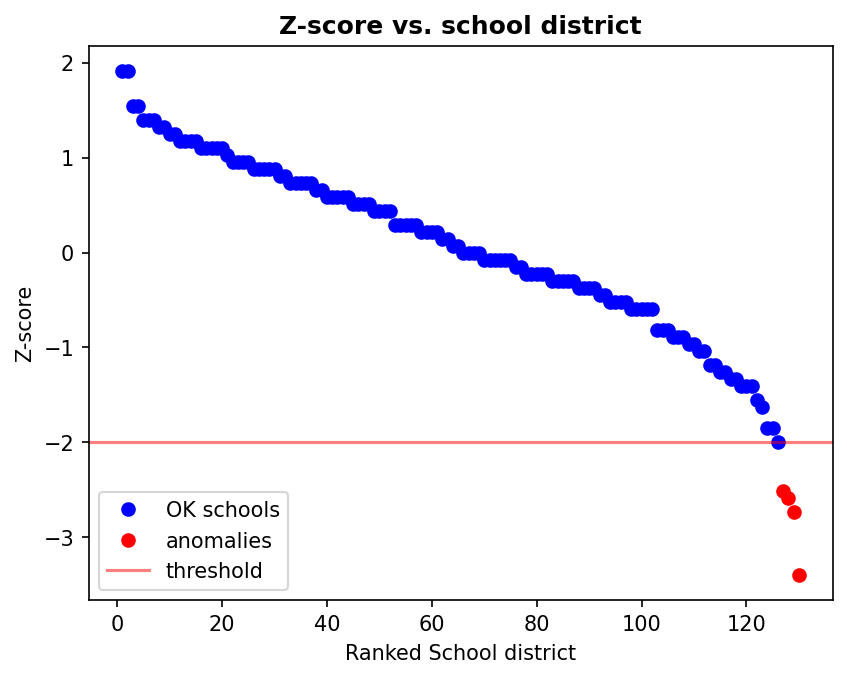

In [35]:
plot_anomaly(df['zscore'], -2)

Finally, get a list of the schools that are anomalies.

In [36]:
zscore_anomalies = df[(df['zscore'] < -2)]
zscore_anomalies

,District,Participation Rate,zscore
50,New Britain,0.40,-2.510660
99,Windham,0.37,-2.731839
121,Eastern Connecticut Regional Educational Servi...,0.39,-2.584386
125,Stamford Academy,0.28,-3.395374


We have found our anomalies, but we still have one thing to do: check our assumption that the data can be modeled approximately as a normal distribution. If this is the case, then we have completed our test. If it isn't, then we cannot connect the z-score with probabilities as we did earlier in this notebook.

First, let's bin the data and see what it looks like as a histogram.

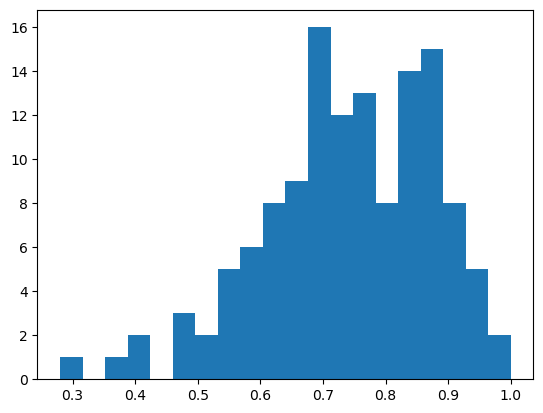

In [37]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(df['Participation Rate'], nbins, density=False,
                           cumulative=False, linewidth=1.0, label='data')

This histogram has two maxima and is skewed left, so it is not likely to be normal. 

We can also compare the cumulative distribution function for our data with the CDF of a normal distribution with the same mean and standard deviation of our data.


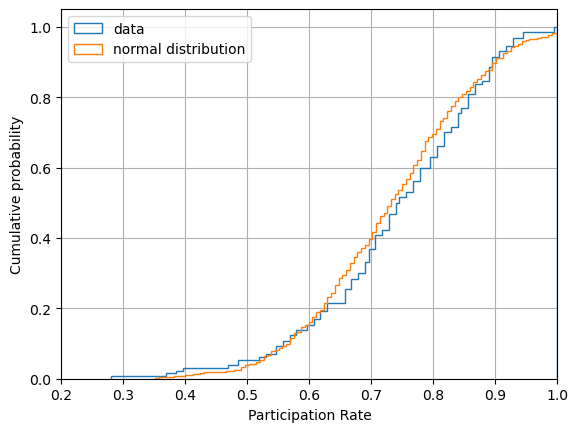

In [38]:
num_bins = 130
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(500)]
n, bins, patches = plt.hist(df['Participation Rate'], num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='data')
plt.hist(normal_dist, num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('Participation Rate')
plt.ylabel('Cumulative probability')
plt.show()

Again, we see a difference. If these two visual tests had not been decisive, we could carry out numerical test for normality (such as the Shapiro-Wilk test).

Even though our data is inconsistent with a normal distribution, both the z-score and the modified z-score did help us identify outliers. So while we cannot make any probabilistic claims based on the z-scores, we can confidently focus our these four schools.

### Zscore vs Modified Zscore

In [39]:
top_goals = pd.read_csv('world_cup_top_goal_scorers.csv', 
                        encoding='utf-8',  
                        names=['Year', 'Player(s)', 'Goals'], skiprows=1)                                                                                
top_goals

,Year,Player(s),Goals
0,1930,Guillermo Stábile,8
1,1934,Oldřich Nejedlý,5
2,1938,Leônidas,7
3,1950,Ademir,8
4,1954,Sándor Kocsis,11
5,1958,Just Fontaine,13
6,1962,"Garrincha, Vavá, Leonel Sánchez, Flórián Alber...",4
7,1966,Eusébio,9
8,1970,Gerd Müller,10
9,1974,Grzegorz Lato,7


Once again will start by using the z-score to identify anomalies. As we are interested in the superstars, this time we will have an upper threshold.  We choose $z = +2$. Above this z-score, any player will be labeled as an anomaly. 

In [40]:
mean_goals = top_goals['Goals'].mean()
stdev_goals = top_goals['Goals'].std(ddof=0)
print('Mean number of goals is {:.2f}'.format(mean_goals))
print('Standard deviation is {:.2f}'.format(stdev_goals))

Mean number of goals is 7.05
Standard deviation is 2.15


Calculate the z-score for each player and add the result to the dataframe.

In [41]:
zscore_goals = ss.zscore(top_goals['Goals'], ddof=0)
top_goals = top_goals.assign(zscore=zscore_goals)
top_goals.head(21)

,Year,Player(s),Goals,zscore
0,1930,Guillermo Stábile,8,0.443242
1,1934,Oldřich Nejedlý,5,-0.952971
2,1938,Leônidas,7,-0.022162
3,1950,Ademir,8,0.443242
4,1954,Sándor Kocsis,11,1.839455
5,1958,Just Fontaine,13,2.770264
6,1962,"Garrincha, Vavá, Leonel Sánchez, Flórián Alber...",4,-1.418375
7,1966,Eusébio,9,0.908647
8,1970,Gerd Müller,10,1.374051
9,1974,Grzegorz Lato,7,-0.022162


In [42]:
def plot_anomaly_goals(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='typical player')
    plt.axhline(threshold,color='r', label='threshold', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title('Z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player Rank')
    plt.ylabel('Z-score')
    plt.show()

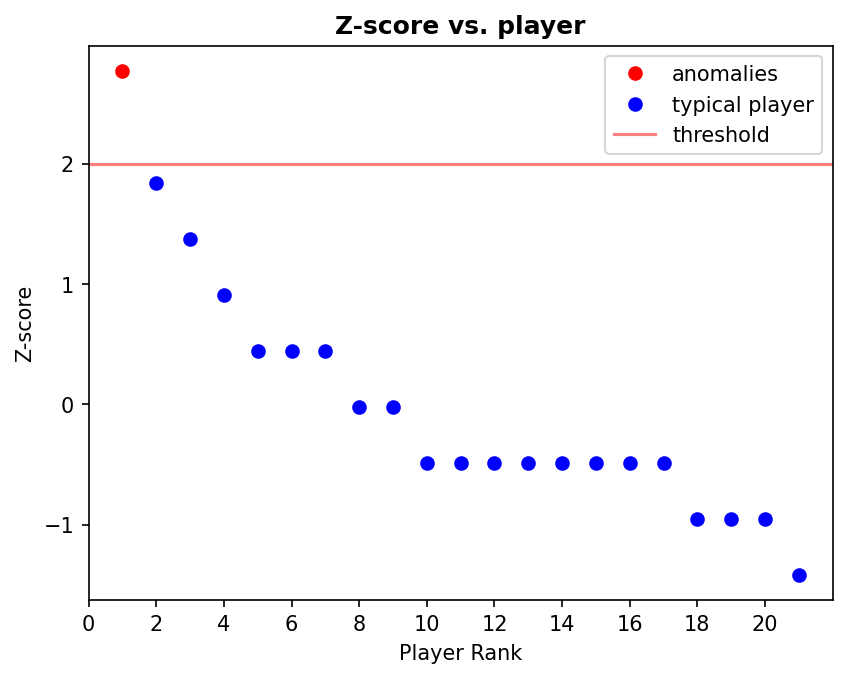

In [43]:
plot_anomaly_goals(top_goals['zscore'], 2)

In [44]:
zscore_anomalies_players = top_goals[(top_goals['zscore'] > 2)]
zscore_anomalies_players

,Year,Player(s),Goals,zscore
5,1958,Just Fontaine,13,2.770264


Only one player is picked out: Just Fontaine.

Fontaine was indeed an amazing player, but clearly our analysis is flawed. By looking at the plot, we see that in 12 out of 21 competitions, the top goalscorer(s) scored less than the mean number of goals (7.05).

Question: What's going on? 

**Answer**: We are seeing an effect we discussed in lectures---the mean and standard deviation are themselves susceptible to the presence of anomalies. With his 13 goals, the amazing Fontaine is raising the mean so much that most players fall below it. As a result, he becomes the only anomaly.

Let's repeat this analysis with the modified z-score and see what happens.

In [45]:
median_goals = np.median(top_goals['Goals'])
median_goals

6.0

The formula for modified z-score is

$y_{i} = (x_{i} - \tilde X)/{\rm MAD}$

Here we are going to make a slight modification and introduce a consistency correction $k$, which allows us to use MAD as a consistent estimate for the standard deviation. The value of $k$ depends on the underlying distribution of the data. For simplicity, we will use the value for a normal distribution $k=1.4826$ (see [https://en.wikipedia.org/wiki/Median_absolute_deviation](https://en.wikipedia.org/wiki/Median_absolute_deviation)).

**Note:** Correction factor of $k=1.4826$ still assumes the underlying data is normal!

So the modified z-score becomes

$y_{i} = (x_{i} - \tilde X)/(k*{\rm MAD})$

In [46]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

As before, compute the modified z-score for all players then plot and list the results. Note that the threshold remains the same at $y = +2$.

In [47]:
mod_zscore_goals, mad_goals = modified_zscore(top_goals['Goals'])
top_goals = top_goals.assign(mod_zscore=mod_zscore_goals)

In [48]:
def plot_anomaly_goals_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical player')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player')
    plt.ylabel('Modified z-score')
    plt.show()

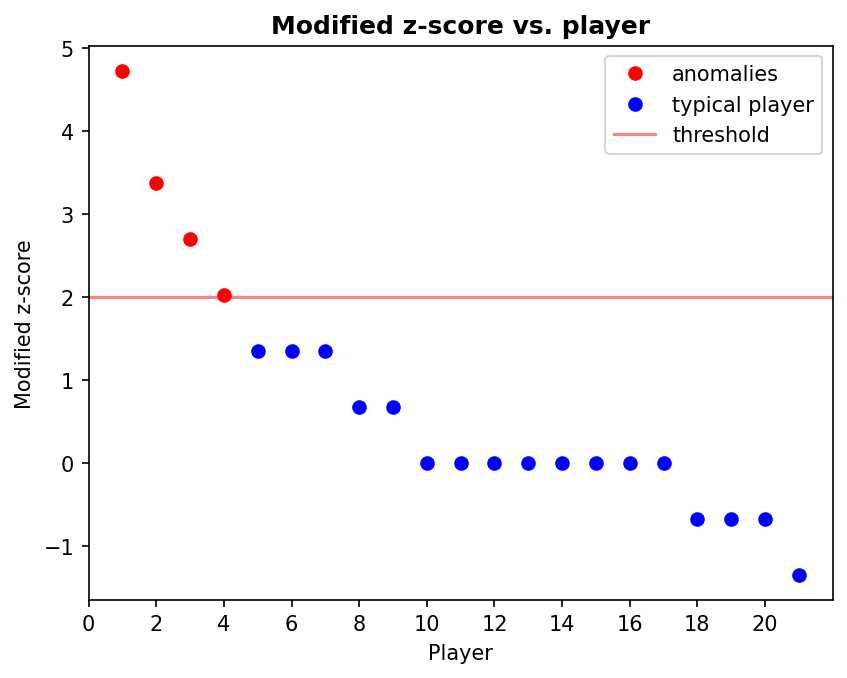

In [49]:
plot_anomaly_goals_2(top_goals['mod_zscore'], 2)

In [50]:
mod_zscore_anomalies_players = top_goals[(top_goals['mod_zscore'] > 2)]
mod_zscore_anomalies_players

,Year,Player(s),Goals,zscore,mod_zscore
4,1954,Sándor Kocsis,11,1.839455,3.372454
5,1958,Just Fontaine,13,2.770264,4.721435
7,1966,Eusébio,9,0.908647,2.023472
8,1970,Gerd Müller,10,1.374051,2.697963


**Question:** How does the MAD compare with the standard deviation calculated previously?

In [51]:
print('The value of MAD is {:.2f}'.format(mad_goals))

The value of MAD is 1.00


and $k*{\rm MAD}$ is 1.48, which is smaller than the standard deviation (2.05). We see that the anomalies have a larger effect on the standard deviation, which depends on the square of the deviation from the mean (MAD depends linearly on the deviation).

## Let's use modified zscore in the previous dataset

In [55]:
median_rate = np.median(df['Participation Rate'])
median_rate

0.745

In [56]:
mod_zscore_rate, mad_rate = modified_zscore(df['Participation Rate'])
low_rates = df.assign(mod_zscore=mod_zscore_rate)

In [57]:
def plot_anomaly_goals_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical player')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player')
    plt.ylabel('Modified z-score')
    plt.show()

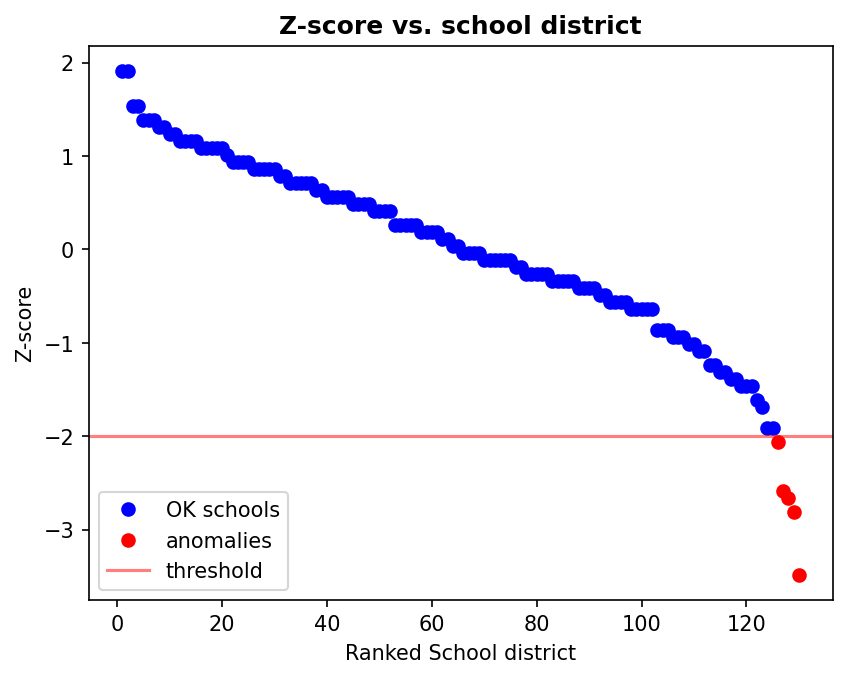

In [59]:
plot_anomaly(low_rates['mod_zscore'], -2)

In [61]:
mod_zscore_anomalies = low_rates[(low_rates['mod_zscore'] < -2)]
mod_zscore_anomalies

,District,Participation Rate,zscore,mod_zscore
50,New Britain,0.40,-2.510660,-2.585548
55,New London,0.47,-1.994577,-2.060944
99,Windham,0.37,-2.731839,-2.810378
121,Eastern Connecticut Regional Educational Servi...,0.39,-2.584386,-2.660491
125,Stamford Academy,0.28,-3.395374,-3.484869


Here, we can see, we got a one extra district which was not given by previous zscore.